[ 0  0  0  0  0  0  0  3  7  4 11 21  9  6  7  2  0  0  0] 11
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  7  4 11 21  9
  6  7  2  0  0  0  0  0  0  0] 23
[1, 1, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0]
max Sample #:  1099 Time Difference (s):  1.0
(1.0, 343.0)
max Sample #:  2099 Time Difference (s):  2.0
Test (2.0, 686.0)
max Sample #:  1399 Time Difference (s):  1.3
max Sample #:  2899 Time Difference (s):  2.8
(1.4999999999999998, 514.49999999999989)


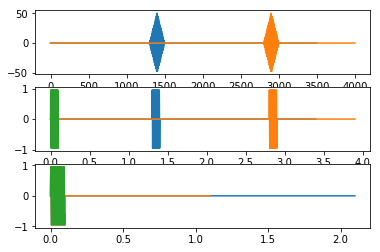

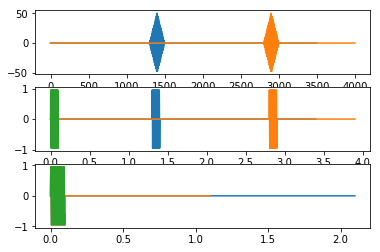

In [8]:
import matplotlib.pyplot as plt
import cairo
import numpy as np
import tempfile
import threading

plt.ion
def measure(scData, micData, fs, latency):
    timeDiff = correlate(scData, micData, fs)
    speedOfSound = 343
    realDiff = timeDiff - latency
    distance = speedOfSound*realDiff  
    return timeDiff, distance

def measureTimeOfArrival(sample, micData, fs):
    timeDiff, acor = correlate(sample, micData, fs)
    speedOfSound = 343
    distance = speedOfSound*timeDiff    
    return timeDiff, distance

def measureTimeDifferenceOfArrival(sample, firstSample, secondSample, fs):
    f, ((ax1, ax2, ax3)) = plt.subplots(3,1)
    ax1.set_title('Correlation')
    ax2.set_title('Recorded Data')
    ax3.set_title('mic, aligned')
    timeDiff1, acor1 = correlate(sample, firstSample, fs)
    timeDiff2, acor2 = correlate(sample, secondSample, fs)
    timeDiff = timeDiff2 - timeDiff1
    speedOfSound = 343
    distance = speedOfSound*timeDiff
    ax1.clear()
    ax1.plot(np.arange(0,len(acor1)),acor1)
    ax1.plot(np.arange(0,len(acor2)),acor2)
    t0 = np.arange(0,len(sample))/fs;
    t1 = np.arange(0,len(firstSample))/fs;
    t2 = np.arange(0,len(secondSample))/fs;
    ax2.clear()
    ax2.plot(t1, firstSample)
    ax2.plot(t2,secondSample)
    ax2.plot(t0, sample)    
    I = np.argmax(acor1)- (len(sample)-1)
    Dataal1 = firstSample[I:]
    t1al = np.arange(0,len(Dataal1))/fs
    I = np.argmax(acor2)- (len(sample)-1)
    Dataal2 = secondSample[I:]
    t2al = np.arange(0,len(Dataal2))/fs
    ax3.clear() 
    ax3.plot(t1al,Dataal1)
    ax3.plot(t2al,Dataal2)
    ax3.plot(t0,sample)
    plt.draw()
    return timeDiff, distance

def correlate(baseSample, data, fs):
    acor = np.correlate(data,baseSample,"full");
    I = np.argmax(acor)
    timeDiff = (I-(len(baseSample)-1))/fs
    print("max Sample #: ",I,"Time Difference (s): ", timeDiff)
    return timeDiff, acor

# generate samples
x=[1,2,0,4,3]
xd=[0,0,0,0,0,0,0,1,1,0,3,2,0,0,0]
xl=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3,2,0,0,0,0,0,0,0]
xd_x = np.correlate(xd,x,"full")
print(xd_x, np.argmax(xd_x))
xl_x = np.correlate(xl,x,"full")
print(xl_x, np.argmax(xl_x))
diff = np.argmax(xl_x) - (len(x)-1)
print(xl[diff:])

fs = 1000
freq = 100
samples = (np.sin(2*np.pi*np.arange(fs*(1/fs*100))*freq/fs)).astype(np.float32)
paddedSample = np.append(np.zeros(fs * (1)), np.append(samples, np.zeros(fs * (2))))
print(measureTimeOfArrival(samples, paddedSample, fs))
print("Test",measureTimeOfArrival(samples, np.append(np.zeros(int(fs * (1))), paddedSample), fs))
firstSample = np.append(np.zeros(int(fs * (1.3))), np.append(samples, np.zeros(int(fs * (2)))))
secondSample = np.append(np.zeros(int(fs * (2.8))), np.append(samples, np.zeros(int(fs * (1)))))
print(measureTimeDifferenceOfArrival(samples, firstSample, secondSample, fs))
plt.savefig('foo.png', bbox_inches='tight')
plt.show()